<a href="https://colab.research.google.com/github/antonychackotc/Northwind-traders-Project-DashQuest-live-/blob/main/Nw_tr2_handling_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preprocessing [ Handling Missing Values & Detect Outliers ]**

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/northwind_traders.csv')
df.head()

,Unnamed: 0,shipperID,employeeID,employeeName,title,reportsTo,categoryID,categoryName,description,productID,...,orderDate,requiredDate,shippedDate,freight,quantity,discount,unitPrice,country,city,companyName
0,0,1,1,Nancy Davolio,Sales Representative,8.0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",2,...,2013-07-17,2013-08-14,2013-07-23,140.51,50,0.20,19.0,USA,New York,Speedy Express
1,1,1,1,Nancy Davolio,Sales Representative,8.0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",2,...,2015-04-01,2015-04-29,2015-04-07,38.51,50,0.20,19.0,USA,New York,Speedy Express
2,2,1,1,Nancy Davolio,Sales Representative,8.0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",2,...,2015-01-05,2015-02-02,2015-01-09,47.38,12,0.20,19.0,USA,New York,Speedy Express
3,3,1,1,Nancy Davolio,Sales Representative,8.0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",2,...,2014-03-10,2014-04-07,2014-03-14,60.18,40,0.15,19.0,USA,New York,Speedy Express
4,4,1,1,Nancy Davolio,Sales Representative,8.0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",24,...,2015-04-16,2015-05-14,2015-04-20,52.52,30,0.25,4.5,USA,New York,Speedy Express


In [ ]:
df.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
df.head()

,shipperID,employeeID,employeeName,title,reportsTo,categoryID,categoryName,description,productID,productName,...,orderDate,requiredDate,shippedDate,freight,quantity,discount,unitPrice,country,city,companyName
0,1,1,Nancy Davolio,Sales Representative,8.0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",2,Chang,...,2013-07-17,2013-08-14,2013-07-23,140.51,50,0.20,19.0,USA,New York,Speedy Express
1,1,1,Nancy Davolio,Sales Representative,8.0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",2,Chang,...,2015-04-01,2015-04-29,2015-04-07,38.51,50,0.20,19.0,USA,New York,Speedy Express
2,1,1,Nancy Davolio,Sales Representative,8.0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",2,Chang,...,2015-01-05,2015-02-02,2015-01-09,47.38,12,0.20,19.0,USA,New York,Speedy Express
3,1,1,Nancy Davolio,Sales Representative,8.0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",2,Chang,...,2014-03-10,2014-04-07,2014-03-14,60.18,40,0.15,19.0,USA,New York,Speedy Express
4,1,1,Nancy Davolio,Sales Representative,8.0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",24,Guarana Fantastica,...,2015-04-16,2015-05-14,2015-04-20,52.52,30,0.25,4.5,USA,New York,Speedy Express


In [ ]:
df.isnull().sum()

,0
shipperID,0
employeeID,0
employeeName,0
title,0
reportsTo,241
categoryID,0
categoryName,0
description,0
productID,0
productName,0


In [ ]:
# reportsTo & shippedDate two columns only missing values

# **Handling Missing Values**

In [ ]:
df['reportsTo']

,reportsTo
0,8.0
1,8.0
2,8.0
3,8.0
4,8.0
...,...
2150,5.0
2151,5.0
2152,5.0
2153,5.0


**to fill missing value - mean, median, mode, ffill, bfill and custom fill or delete column more than 70% missing values based on client suggestion or business analytics refered by cliet**

# **now i am filling missing values based on skew and outliers**

In [5]:
import seaborn as sns

<ipython-input-6-43bf3713f634>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['reportsTo'])


-0.7603616408007503

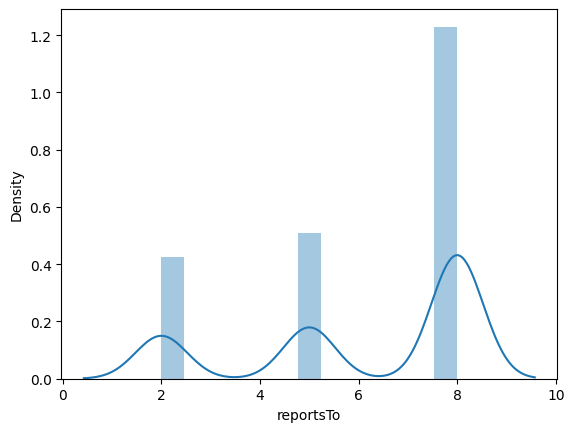

In [6]:
sns.distplot(df['reportsTo'])
df['reportsTo'].skew()

# **its not a normal distribution  -> Normal distribution range btw ( -0.5 to 0.5 )**
# **values -0.7603616408007503 is negative tail**

<Axes: xlabel='reportsTo'>

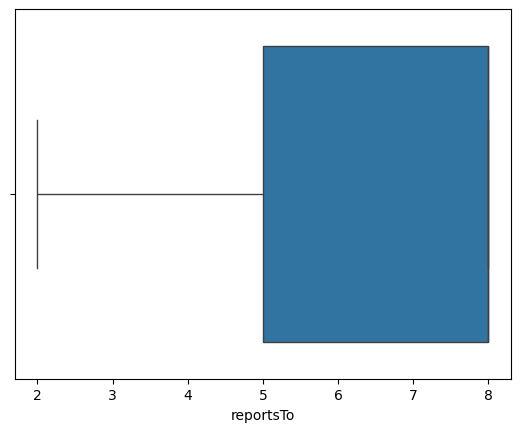

In [7]:
sns.boxplot(x=df['reportsTo'])

# **No Outlier in this Columns its Good**

# **use column to fill median**

In [8]:
df['reportsTo'] = df['reportsTo'].fillna(df['reportsTo'].median())

In [9]:
df.isnull().sum()

,0
Unnamed: 0,0
shipperID,0
employeeID,0
employeeName,0
title,0
reportsTo,0
categoryID,0
categoryName,0
description,0
productID,0


# **now 2nd column**

In [10]:
df['shippedDate']

,shippedDate
0,2013-07-23
1,2015-04-07
2,2015-01-09
3,2014-03-14
4,2015-04-20
...,...
2150,2015-01-05
2151,2013-07-31
2152,2013-07-15
2153,2015-01-23


#**its look time filling method now using to forward fill**

# **forward fill or backward fill is mainly used for timeseries**

In [11]:
df['shippedDate'] = df['shippedDate'].fillna(method='ffill')

<ipython-input-11-1f760e5c0d68>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['shippedDate'] = df['shippedDate'].fillna(method='ffill')


In [12]:
df.isnull().sum()

,0
Unnamed: 0,0
shipperID,0
employeeID,0
employeeName,0
title,0
reportsTo,0
categoryID,0
categoryName,0
description,0
productID,0


In [13]:
df.to_csv('cleaned-nw-traders.csv')